# Facebook Prophet: Univariate and Multivariate Analysis

https://facebook.github.io/prophet/docs/quick_start.html

Pre-requisites:
- pystan
- prophet

In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [15]:
df_train = pd.read_csv('../data_sets/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('../data_sets/DailyDelhiClimateTest.csv')

In [16]:
len(df_train)

1462

In [17]:
len(df_test)

114

In [18]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


## Univariate Forecasting

In [ ]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date': 'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y']) # basic log transformation to make data stationary.

# In Facebook Prophet, default to log transformation.

# only using date to predict mean temperature

In [22]:
df_train.head()
# verify y_orig preserved original meantemp data, and meantemp transformed to log and renamed 'y'

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [23]:
# Instantiate Prophet model

model = Prophet()
model.fit(df_train)

15:00:26 - cmdstanpy - INFO - Chain [1] start processing
15:00:26 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Daily prediction for the next 113 days

future_data = model.make_future_dataframe(periods=113, freq='D')
forecast_data = model.predict(future_data)

In [ ]:
#forecast_data.head()
# yhat = predicted, and upper and lower ranges of prediction
forecast_data[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.554010,3.430648,3.681193
1571,2017-04-21,3.557805,3.429380,3.688295
1572,2017-04-22,3.558106,3.439862,3.687587
1573,2017-04-23,3.557496,3.428283,3.687183
1574,2017-04-24,3.574766,3.453238,3.702042


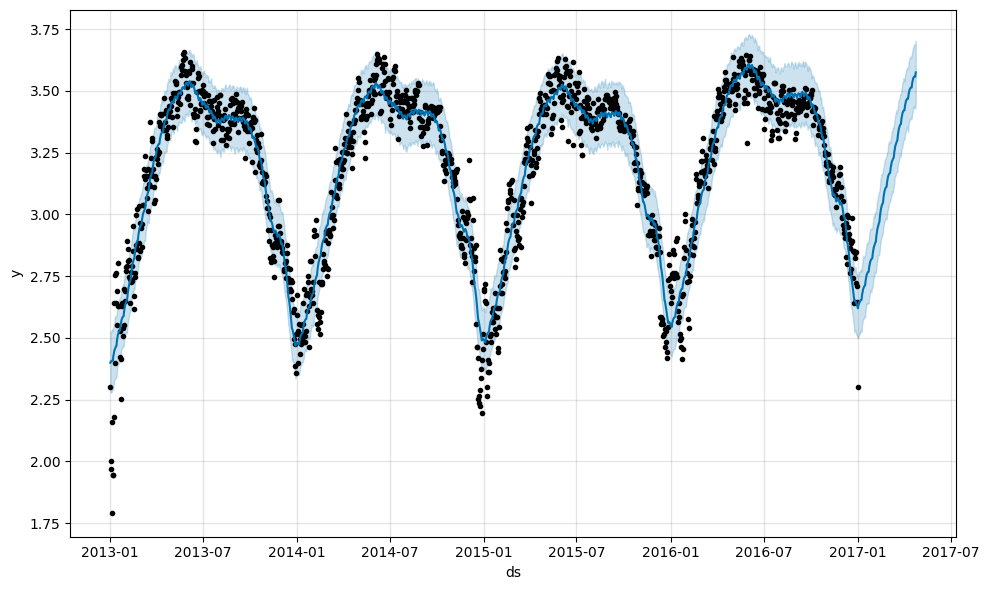

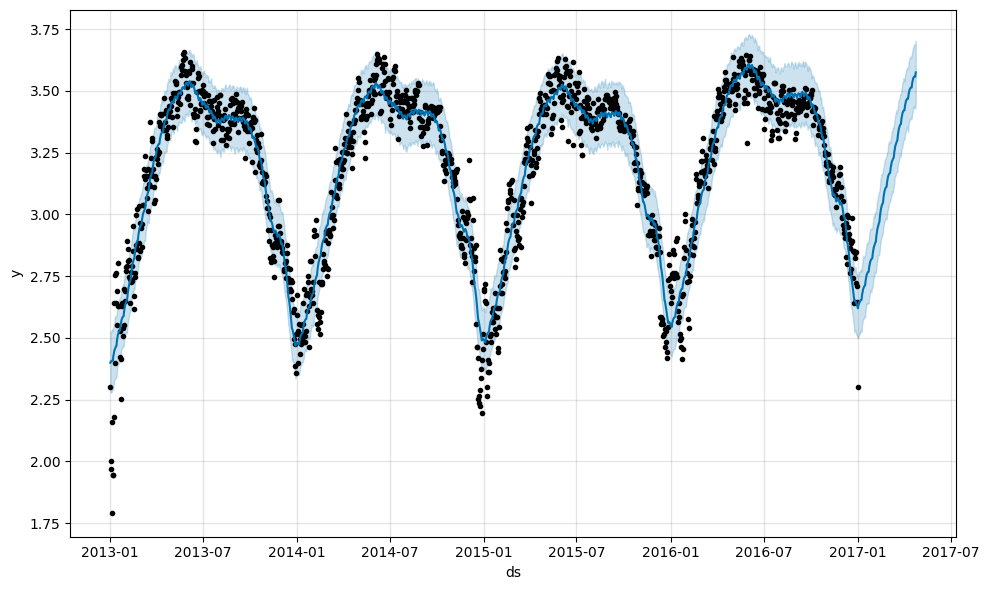

In [27]:
model.plot(forecast_data)